In [1]:
import numpy as np
import statsmodels.api as sm

In [2]:
num = 1000 
 
event_time = int(num / 2) 
 
R_market = np.random.normal(0, 1, num) + np.arange(num) / num 
 
R_target = 2 + R_market + np.random.normal(0, 1, num) + (np.arange(num) == int(num / 2) + 1) * 2 
 
results = sm.OLS(R_target[:event_time], sm.add_constant(R_market[:event_time])).fit() 
 
alpha, beta = results.params 
 
resid = R_target - results.predict(sm.add_constant(R_market)) 
 
print(resid[event_time + 1] / resid[:event_time].std(ddof = 2)) 

3.027962539680007


In [3]:
success = 0
n_sim = 1000
num = 1000 
 
event_time = int(num / 2) 

for _ in range(n_sim):
 
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num 
 
    R_target = 2 + R_market + np.random.normal(0, 1, num) + (np.arange(num) == int(num / 2) + 1) * 2 
 
    results = sm.OLS(R_target[:event_time], sm.add_constant(R_market[:event_time])).fit() 
 
    alpha, beta = results.params 
 
    resid = R_target - results.predict(sm.add_constant(R_market)) 
    tval = resid[event_time + 1]/ resid[:event_time].std(ddof=2)
    if abs(tval) > 1.96:
        success += 1
print("Estimated power", success / n_sim)

Estimated power 0.497


In [4]:
#q2
num = 1000
event_time = int(num/2)

np.random.seed(0)
R_market = np.random.normal(0, 1, num) + np.arange(num) / num 
 
R_target = 2 + R_market + np.random.normal(0, 1, num) + (np.arange(num) == event_time + 1) * 2 

success = 0
tested_times = 0

for fictitious_event_time in range(100, num-2):
    result = sm.OLS(
        R_target[:fictitious_event_time],
        sm.add_constant(R_market[:fictitious_event_time])
    ).fit()
    resid = R_target - results.predict(sm.add_constant(R_market))
    tval = resid[fictitious_event_time] / resid[:fictitious_event_time].std(ddof=2)
    if abs(tval) > 1.96:
        success += 1
    tested_times += 1
print('Fraction significant:', success/tested_times)

Fraction significant: 0.05011135857461024


In [5]:
# q3
num = 1000
event_time = int(num/2)
n_sim = 500
results = []

for seed in range(n_sim):
    np.random.seed(seed)
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num
    R_target = 2 + R_market + np.random.normal(0, 1, num) + (np.arange(num) == event_time + 1) * 2
    
    model = sm.OLS(R_target[:event_time], sm.add_constant(R_market[:event_time])).fit()
    resid = R_target - model.predict(sm.add_constant(R_market))
    t_real = abs(resid[event_time + 1]/resid[:event_time].std(ddof=2))

# 20 before and 20 after
    count = 0
    total = 0
    for offset in range(-20, 21):
        fake_time = event_time + offset
        if fake_time == event_time + 1 or fake_time < 100 or fake_time > num - 3:
            continue
        model_fake = sm.OLS(R_target[:fake_time], sm.add_constant(R_market[:fake_time])).fit()
        resid_fake = R_target - model_fake.predict(sm.add_constant(R_market))
        t_fake = abs(resid_fake[fake_time]/resid_fake[:fake_time].std(ddof=2))
        if t_fake > t_real:
            count += 1
        total += 1
    results.append(count/total)
print("Average fraction of placebo t_value > real t_values:",np.mean(results))

Average fraction of placebo t_value > real t_values: 0.14809999999999998


In [6]:
def make_error(corr_const, num): 
 
 
  sigma = 5 * 1 / np.sqrt((1 - corr_const)**2 / (1 - corr_const**2)) 
 
 
  err = list() 
 
 
  prev = np.random.normal(0, sigma) 
 
 
  for n in range(num): 
 
 
    prev = corr_const * prev + (1 - corr_const) * np.random.normal(0, sigma) 
 
 
    err.append(prev) 
 
 
  return np.array(err) 

In [7]:
#q4
def make_error(corr_const, num):
    sigma = 5 * 1 / np.sqrt((1 - corr_const)**2 / (1 - corr_const**2)) 
    err = []
    prev = np.random.normal(0, sigma)
    for n in range(num): 
        prev = corr_const * prev + (1 - corr_const) * np.random.normal(0, sigma) 
        err.append(prev) 
    return np.array(err)

num = 1000
event_time = int(num / 2)
np.random.seed(0)
R_market = np.random.normal(0, 1, num) + np.arange(num) / num
error = make_error(0.9, num)
R_target = 2 + R_market + error + (np.arange(num) == event_time + 1) * 2

success = 0
tested_times = 0

for fictitious_event_time in range(100, num - 2):
    results = sm.OLS(
        R_target[:fictitious_event_time],
        sm.add_constant(R_market[:fictitious_event_time])
    ).fit()
    resid = R_target - results.predict(sm.add_constant(R_market))
    tval = resid[fictitious_event_time]/resid[:fictitious_event_time].std(ddof=2)

    if abs(tval) > 1.96:
        success += 1
    tested_times += 1
print("Fraction significant (placebo, autocorrelated errors):", success / tested_times)

Fraction significant (placebo, autocorrelated errors): 0.036748329621380846


In [8]:
# ?
def make_error(corr_const, num): 
    sigma = 5 * 1 / np.sqrt((1 - corr_const)**2 / (1 - corr_const**2)) 
    err = []
    prev = np.random.normal(0, sigma)
    for n in range(num):
        prev = corr_const * prev + (1 - corr_const) * np.random.normal(0, sigma)
        err.append(prev)
    return np.array(err)

num = 1000
event_time = int(num / 2)
n_sim = 500
results = []

for seed in range(n_sim):
    np.random.seed(seed)
    R_market = np.random.normal(0, 1, num) + np.arange(num) / num
    error = make_error(0.9, num)
    R_target = 2 + R_market + error + (np.arange(num) == event_time + 1) * 2
    
    model = sm.OLS(R_target[:event_time], sm.add_constant(R_market[:event_time])).fit()
    resid = R_target - model.predict(sm.add_constant(R_market))
    t_real = abs(resid[event_time + 1]/resid[:event_time].std(ddof=2))

    count = 0
    total = 0
    for offset in range(-20, 21):
        fake_time = event_time + offset
        if fake_time == event_time + 1 or fake_time < 100 or fake_time > num - 3:
            continue
        model_fake = sm.OLS(R_target[:fake_time], sm.add_constant(R_market[:fake_time])).fit()
        resid_fake = R_target - model_fake.predict(sm.add_constant(R_market))
        t_fake = abs(resid_fake[fake_time]/resid_fake[:fake_time].std(ddof=2))
        if t_fake > t_real:
            count += 1
        total += 1
    results.append(count/total)

print("Average fraction of placebo t_value > real t_value (autocorrelated errors):", np.mean(results))


Average fraction of placebo t_value > real t_value (autocorrelated errors): 0.4651


                 Model  Accuracy  AUC
0           Value Only  0.993333  1.0
1  Value + Derivatives  1.000000  1.0


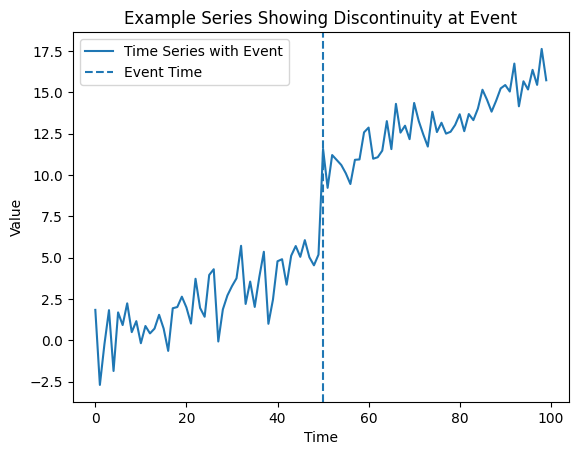

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

np.random.seed(42)
n_samples = 500
series_length = 100
event_time = 50
features = []
labels = []


for i in range(n_samples):
    slope = 0.1
    noise = np.random.normal(0, 1, series_length)
    y = slope * np.arange(series_length) + noise
    
    # if there's an event effect
    has_event = np.random.choice([0, 1])
    labels.append(has_event)
    
    
    if has_event:
        jump = np.random.normal(5, 1)
    else:
        jump = 0
    y[event_time:] += jump
    
    # Calculate features
    pre_window = slice(event_time - 5, event_time)
    post_window = slice(event_time + 1, event_time + 6)
    
    # Value change
    val_diff = y[post_window].mean() - y[pre_window].mean()
    
    # First derivative (difference)
    dy = np.diff(y)
    dy_pre = dy[event_time - 5:event_time]
    dy_post = dy[event_time:event_time + 5]
    deriv_diff = dy_post.mean() - dy_pre.mean()
    
    # Second derivative (difference of difference)
    ddy = np.diff(dy)
    ddy_pre = ddy[event_time - 5:event_time]
    ddy_post = ddy[event_time:event_time + 5]
    deriv2_diff = ddy_post.mean() - ddy_pre.mean()
    
    # Append feature vectors
    features.append([val_diff, deriv_diff, deriv2_diff])

df = pd.DataFrame(features, columns=['value_diff', 'deriv_diff', 'deriv2_diff'])
df['label'] = labels

# Split dataset
X = df[['value_diff']]
X_full = df[['value_diff', 'deriv_diff', 'deriv2_diff']]
y_labels = df['label']
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y_labels, test_size=0.3, random_state=42)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_labels, test_size=0.3, random_state=42)

# Train models
model_v = LogisticRegression(solver='liblinear')
model_full = LogisticRegression(solver='liblinear')
model_v.fit(X_train_v, y_train_v)
model_full.fit(X_train_full, y_train_full)

# Predict and evaluate
y_pred_v = model_v.predict(X_test_v)
y_proba_v = model_v.predict_proba(X_test_v)[:, 1]
acc_v = accuracy_score(y_test_v, y_pred_v)
auc_v = roc_auc_score(y_test_v, y_proba_v)

y_pred_full = model_full.predict(X_test_full)
y_proba_full = model_full.predict_proba(X_test_full)[:, 1]
acc_full = accuracy_score(y_test_full, y_pred_full)
auc_full = roc_auc_score(y_test_full, y_proba_full)

# Display results
results = pd.DataFrame({
    'Model': ['Value Only', 'Value + Derivatives'],
    'Accuracy': [acc_v, acc_full],
    'AUC': [auc_v, auc_full]
})
print(results)

example_index = df[df['label'] == 1].index[0]
slope = 0.1
noise = np.random.normal(0, 1, series_length)
y_example = slope * np.arange(series_length) + noise
jump = np.random.normal(5, 1)
y_example[event_time:] += jump

plt.figure()
plt.plot(y_example, label='Time Series with Event')
plt.axvline(event_time, linestyle='--', label='Event Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Series Showing Discontinuity at Event')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

np.random.seed(0)
groups      = ['A', 'B', 'C']
intercepts  = {'A': 10, 'B': 20, 'C': 30}
slope       = 0.5
jump        = 5
n_periods   = 50
event_time  = 25
rows = []
for g in groups:
    for t in range(n_periods):
        # baseline + noise
        y = intercepts[g] + slope*t + np.random.normal(scale=1)
        # add common jump after event
        if t >= event_time:
            y += jump
        rows.append({'group': g, 'time': t, 'event': int(t >= event_time), 'y': y})

df = pd.DataFrame(rows)

#Fit the fixed‑effects event study model
#  group c creates one dummy per group (dropping the first by default)
model = smf.ols('y ~ C(group) + time + event', data=df).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5519.
Date:                Tue, 29 Jul 2025   Prob (F-statistic):          2.65e-157
Time:                        22:49:18   Log-Likelihood:                -214.50
No. Observations:                 150   AIC:                             439.0
Df Residuals:                     145   BIC:                             454.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.2313      0.218     46.830

In [11]:
df

,group,time,event,y
0,A,0,0,11.764052
1,A,1,0,10.900157
2,A,2,0,11.978738
3,A,3,0,13.740893
4,A,4,0,13.867558
...,...,...,...,...
145,C,45,1,58.444479
146,C,46,1,57.087178
147,C,47,1,59.617016
148,C,48,1,57.684093
